In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()


In [38]:
netflix_df=pd.read_csv('/content/dataset - netflix1.csv')

In [39]:
netflix_df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [40]:
netflix_df.shape

(8790, 10)

In [41]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [42]:
netflix_df.dtypes

show_id         object
type            object
title           object
director        object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
dtype: object

In [43]:
netflix_df.isna().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [44]:
netflix_df.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [45]:
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'])

In [46]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   listed_in     8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 686.8+ KB


In [47]:
netflix_df.drop(['show_id'],axis=1,inplace=True)
netflix_df.columns

Index(['type', 'title', 'director', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in'],
      dtype='object')

In [48]:
netflix_df.head(10)

,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
5,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV"
6,Movie,The Starling,Theodore Melfi,United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas"
7,Movie,Motu Patlu in the Game of Zones,Suhas Kadav,India,2021-05-01,2019,TV-Y7,87 min,"Children & Family Movies, Comedies, Music & Mu..."
8,Movie,Je Suis Karl,Christian Schwochow,Germany,2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies"
9,Movie,Motu Patlu in Wonderland,Suhas Kadav,India,2021-05-01,2013,TV-Y7,76 min,"Children & Family Movies, Music & Musicals"


<Axes: xlabel='rating', ylabel='count'>

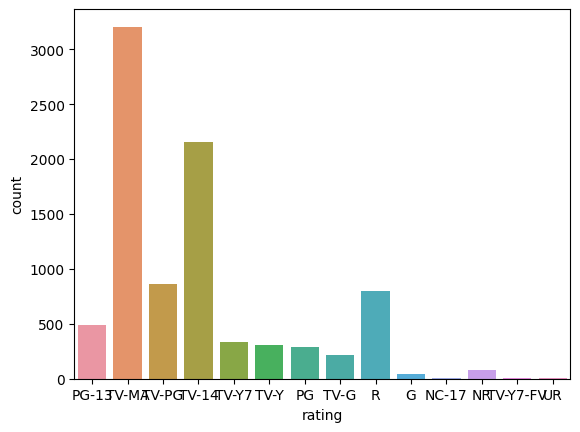

In [49]:
sns.countplot(x='rating',data=netflix_df)

<Axes: xlabel='type', ylabel='count'>

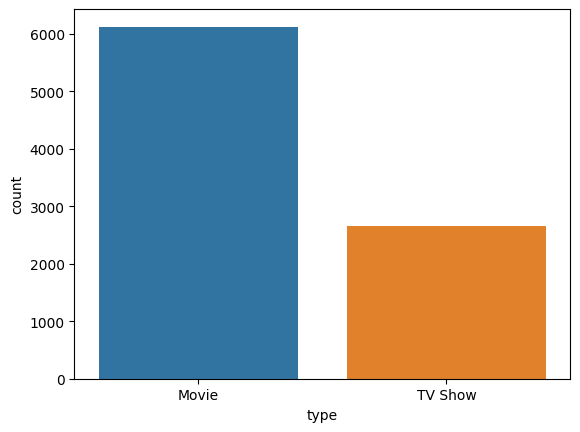

In [50]:
sns.countplot(x='type',data=netflix_df)

In [51]:
netflix_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8785    False
8786    False
8787    False
8788    False
8789    False
Length: 8790, dtype: bool

In [52]:
netflix_df['type']=label_encoder.fit_transform(netflix_df['type'])
netflix_df['country']=label_encoder.fit_transform(netflix_df['country'])
netflix_df['rating']=label_encoder.fit_transform(netflix_df['rating'])


<Axes: >

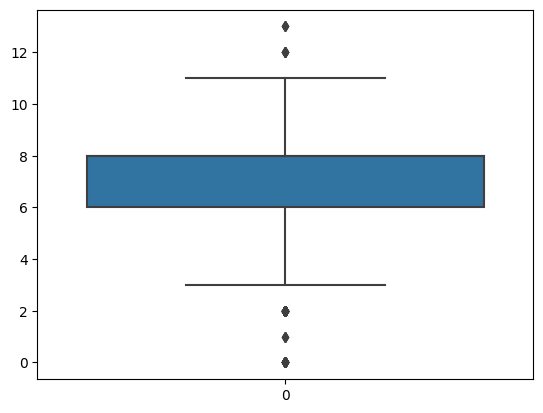

In [53]:
sns.boxplot(netflix_df['rating'])

In [56]:
upper_limit_rating=netflix_df['rating'].mean()+3*netflix_df['rating'].std()
lower_limit_rating=netflix_df['rating'].mean()-3*netflix_df['rating'].std()
print(upper_limit_rating,lower_limit_rating)
outliers=netflix_df.loc[(netflix_df['rating']>upper_limit_rating) | (netflix_df['rating']<lower_limit_rating)]

print(len(outliers))
new_data=netflix_df.loc[~((netflix_df['rating']>upper_limit_rating) | (netflix_df['rating']<lower_limit_rating))]

len(new_data)

12.868447471536719 1.1661372838671493
47


8743

<Axes: >

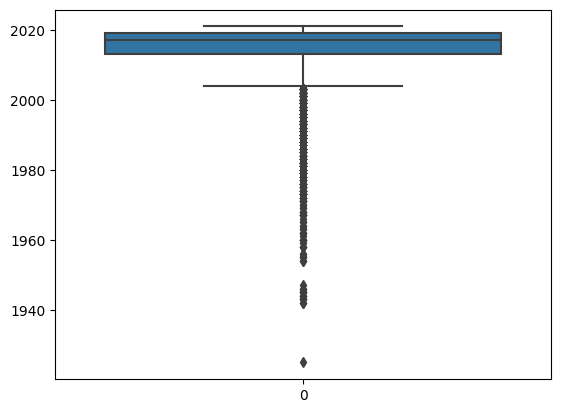

In [58]:
sns.boxplot(netflix_df['release_year'])

In [59]:
upper_limit_rating=netflix_df['release_year'].mean()+3*netflix_df['release_year'].std()
lower_limit_rating=netflix_df['release_year'].mean()-3*netflix_df['release_year'].std()
print(upper_limit_rating,lower_limit_rating)
outliers=netflix_df.loc[(netflix_df['release_year']>upper_limit_rating) | (netflix_df['release_year']<lower_limit_rating)]

print(len(outliers))
new_data=netflix_df.loc[~((netflix_df['release_year']>upper_limit_rating) | (netflix_df['release_year']<lower_limit_rating))]

2040.6595607699119 1987.7067645998263
217


In [60]:
new_data.to_csv('cleaned_data_csv',index=False)